In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import sympy as sp
sp.init_printing()
import math as mt
import sympy as sym
import pandas as pd
import urllib.request
from scipy.interpolate import lagrange, CubicHermiteSpline, BarycentricInterpolator, CubicSpline

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Edgar Junior Córdoba G
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



         2
-0.4053 x + 1.273 x


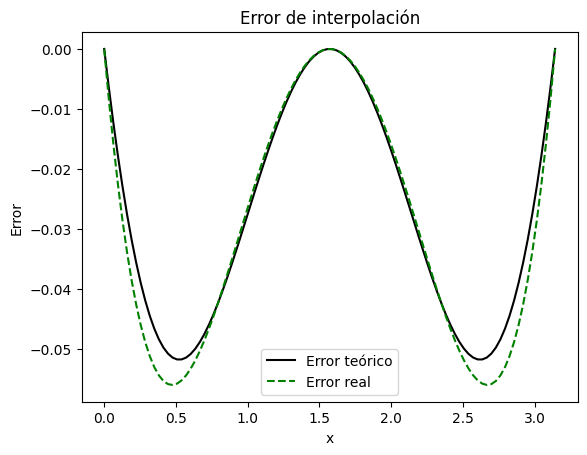

In [ ]:
f = lambda x: sp.sin(x)

x = np.array([0, np.pi/2, np.pi])
y = np.array([f(0), f(np.pi/2), f(np.pi)])

# Obtener el polinomio de interpolación de Lagrange
P = lagrange(x, y)

poly = np.poly1d(P)
print(poly)

x = sp.symbols('x')
f = f(x)

df = sp.diff(f, x, 3)
df = sp.lambdify(x, df, 'numpy')

# Definir la función de error teórico de interpolación
e_teórico = lambda z: (df(z) / mt.factorial(4)) * (z - 0) * (z - (np.pi/2)) * (z - (np.pi))

e_r = lambda z: np.sin(z) - P(z)

z = np.linspace(0, np.pi, 100)
m = e_teórico(z)
n = e_r(z)

plt.plot(z, m, 'black', label='Error teórico')
plt.plot(z, n, 'green', linestyle='--', label='Error real')

#Graficar
plt.title('Error de interpolación')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.show()

# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

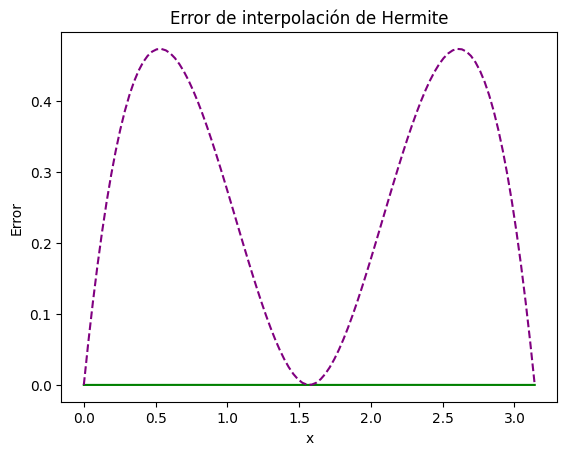

In [ ]:
g = lambda z: sp.sin(z)

puntos_x = np.array([0, np.pi/2, np.pi])
puntos_y = np.array([g(0), g(np.pi/2), g(np.pi)])
z = sp.symbols('z')
g = g(z)

# Calcular la derivada
dg = sp.diff(g, z, 3)
dg = sp.lambdify(z, dg, 'numpy')

# Evaluar la derivada
derivadas = np.array([dg(0), dg(np.pi/2), dg(np.pi)])

# Construir el polinomio de Hermite
P_h = CubicHermiteSpline(puntos_x, puntos_y, derivadas)
#Calculamos la octava derivada de sen0
dg_8 = sp.diff(g, z, 8)
dg_8 = sp.lambdify(z, dg_8, 'numpy')

# Error Teorico
e_t = lambda m: (dg_8(m) / mt.factorial(8)) * ((m - 0)**2) * ((m - (np.pi/2))**2) * ((m - np.pi)**2)

# Error Real
e_r = lambda m: np.sin(m) - P_h(m)

w = np.linspace(0, np.pi, 100)
q = e_t(w)
r = e_r(w)

plt.plot(w, q, color='green')
plt.plot(w, r, color='purple', linestyle='--')

plt.title('Error de interpolación de Hermite')
plt.xlabel('x')
plt.ylabel('Error')
plt.show()


# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

            8             7             6             5             4
-1.155e-13 x + 9.976e-11 x - 3.543e-08 x + 6.631e-06 x - 0.0006943 x
            3         2
 + 0.03955 x - 1.093 x + 11.41 x + 10.6


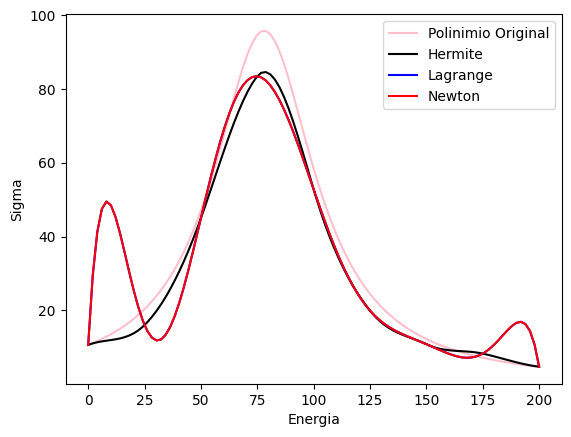

In [ ]:
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
sig_0= 72506.65
E_r = 78
Gamma = 55

m= lambda E: sig_0/(((E-E_r)**2) + (Gamma**2)/4)


E = sp.symbols('E')
m = m(E)

dm = sp.diff(m, E)
dm = sp.lambdify(E, dm, 'numpy')

derivadas = np.array([dm(0), dm(25), dm(50), dm(75), dm(100), dm(125), dm(150), dm(175), dm(200)])

polinomio_hermite = CubicHermiteSpline(Energia, sigma_exp, derivadas)

m= lambda E: sig_0/(((E-E_r)**2) + (Gamma**2)/4)
#Polinomio Lagrage
p_g = lagrange(Energia, sigma_exp)

poly = np.poly1d(p_g)
#Polinomio Newton
p_n = BarycentricInterpolator(Energia, sigma_exp)

print(poly)

Energia= np.linspace(0,200,100)
x= m(Energia)
y= polinomio_hermite(Energia)
z= p_g(Energia)
w= p_n(Energia)

plt.plot(Energia, x, color='pink', label = 'Polinimio Original')
plt.plot(Energia, y, color='black', label = 'Hermite')
plt.plot(Energia, z, color='blue', label = 'Lagrange')
plt.plot(Energia, w, color='red', label = 'Newton')
plt.xlabel('Energia')
plt.ylabel('Sigma')
plt.legend()
plt.show()

plt.show()

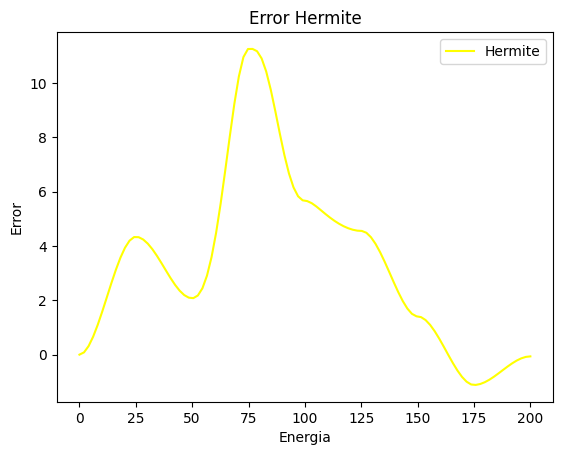

In [ ]:
R= x-y
plt.plot(Energia, R, color='Yellow', label = 'Hermite')
plt.title('Error Hermite')
plt.xlabel('Energia')
plt.ylabel('Error')
plt.legend()
plt.show()

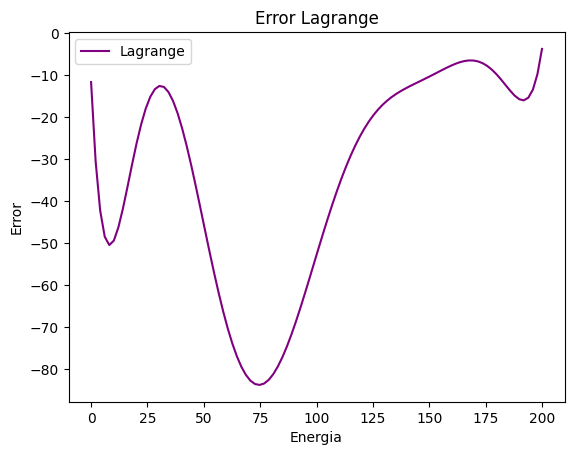

In [ ]:
R= x-z
plt.plot(Energia, R, color='purple', label = 'Lagrange')
plt.title('Error Lagrange')
plt.xlabel('Energia')
plt.ylabel('Error')
plt.legend()
plt.show()

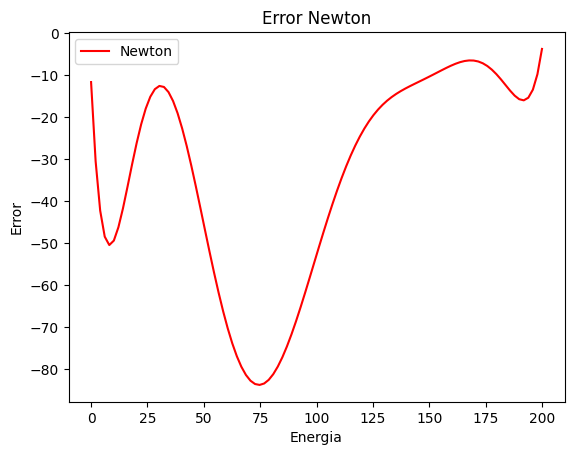

In [ ]:
R= x-w
plt.plot(Energia, R, color='red', label = 'Newton')
plt.title('Error Newton')
plt.xlabel('Energia')
plt.ylabel('Error')
plt.legend()
plt.show()

#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

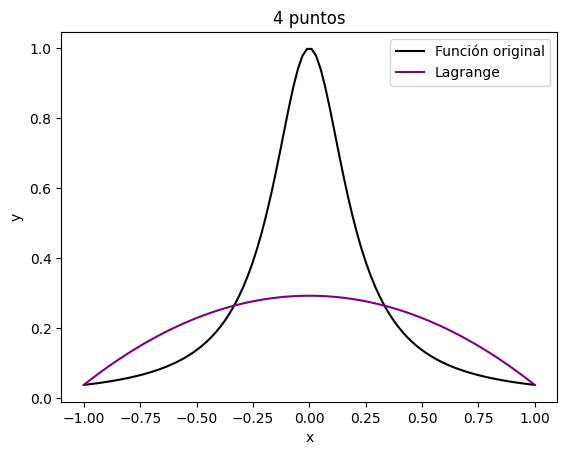

In [ ]:
f= lambda x: 1/(1+25*x**2)
x_1= np.linspace(-1,1,4)
y=np.array([f(i) for i in x_1 ])
Lagrange_4= lagrange(x_1,y)
x= np.linspace(-1,1,100)

plt.plot(x, f(x), color='black', label='Función original')
plt.plot(x, Lagrange_4(x), color='purple', label='Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('4 puntos')
plt.legend()
plt.show()

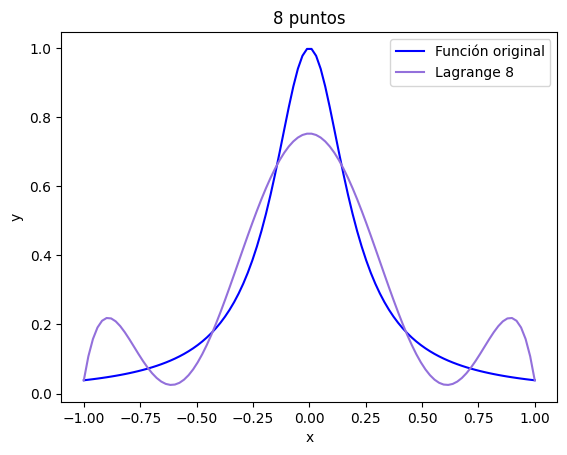

In [ ]:
x_2= np.linspace(-1,1,8)
y=np.array([f(i) for i in x_2 ])
Lagrange_8= lagrange(x_2,y)
x= np.linspace(-1,1,100)
plt.plot(x, f(x), color='blue', label='Función original')
plt.plot(x, Lagrange_8(x), color='mediumpurple', label='Lagrange 8')
plt.xlabel('x')
plt.ylabel('y')
plt.title('8 puntos')
plt.legend()
plt.show()

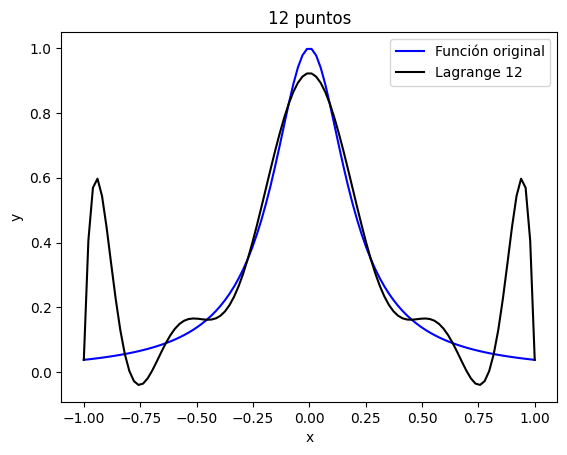

In [ ]:
x_3= np.linspace(-1,1,12)
y=np.array([f(i) for i in x_3 ])
Lagrange_12= lagrange(x_3,y)
x= np.linspace(-1,1,100)
plt.plot(x,f(x), color= 'blue', label='Función original')
plt.plot(x, Lagrange_12(x), color='black', label='Lagrange 12')
plt.xlabel('x')
plt.ylabel('y')
plt.title('12 puntos')
plt.legend()
plt.show()

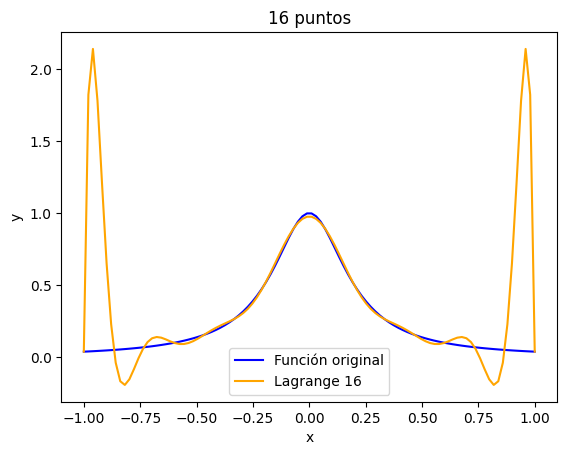

In [ ]:
x_4= np.linspace(-1,1,16)
y=np.array([f(i) for i in x_4 ])
Lagrange_16= lagrange(x_4,y)
x= np.linspace(-1,1,100)
plt.plot(x,f(x), color= 'blue', label='Función original')
plt.plot(x, Lagrange_16(x), color='orange', label='Lagrange 16')
plt.xlabel('x')
plt.ylabel('y')
plt.title('16 puntos')
plt.legend()
plt.show()

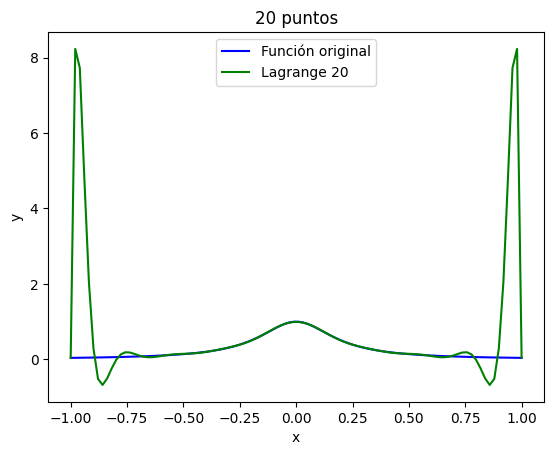

In [ ]:
x_5= np.linspace(-1,1,20)
y=np.array([f(i) for i in x_5 ])
Lagrange_20= lagrange(x_5,y)
x= np.linspace(-1,1,100)
plt.plot(x,f(x), color= 'blue', label='Función original')
plt.plot(x, Lagrange_20(x), color='green', label='Lagrange 20')
plt.xlabel('x')
plt.ylabel('y')
plt.title('20 puntos')
plt.legend()
plt.show()

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



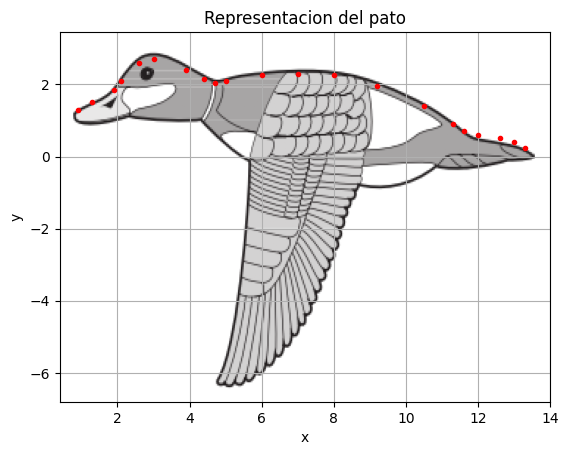

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

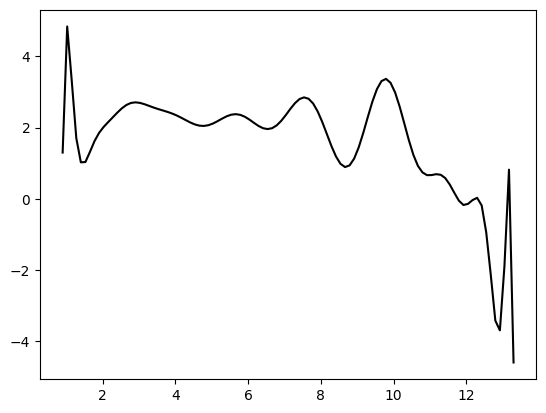

In [ ]:
xi = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yi = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

lagrange_pato = lagrange(xi, yi)

puntos = np.linspace(0.9, 13.3, 100)
ypato = lagrange_pato(puntos)

plt.plot(puntos, ypato, 'black')

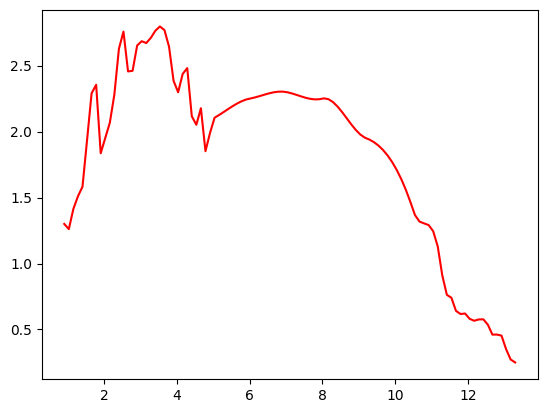

In [ ]:
d = []

for i in range(len(xp)) :

  if i == len(xp)-1 :

    m = yp[i]/xp[i]
    d.append(m)
    break

  m = ((yp[i+1] - yp[i]/(xp[i+1] - xp[i])))
  d.append(m)

h = CubicHermiteSpline(xp, yp, d)

puntos = np.linspace(0.9, 13.3, 100)
ypato = h(puntos)

plt.plot(puntos, ypato, 'r')

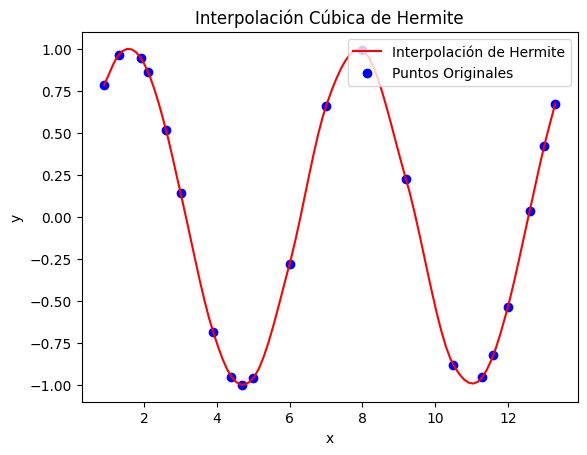

In [ ]:
yp = np.sin(xi)  # Funcion Sen(xi)

# Calcular derivadas
derivadas = np.gradient(yp,xi)

# Construir el polinomio de Hermite
h_p = CubicHermiteSpline(xi, yp, derivadas)

# Generar puntos para evaluar la interpolación
puntos = np.linspace(min(xi), max(xi), 100)
yp_interp = h_p(puntos)

plt.plot(puntos, yp_interp, 'r', label="Interpolación de Hermite")
plt.scatter(xi, yp, color='blue', label="Puntos Originales")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.title("Interpolación Cúbica de Hermite")
plt.show()
